In [1]:
import scipy.stats as stats
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


data = pd.read_csv("bfro_reports_geocoded.csv")
# Reducing dataframe to weather only columns
weatherData = data.loc[:,['classification','temperature_high', 'temperature_mid', 'temperature_low', 'dew_point',
       'humidity', 'cloud_cover', 'moon_phase', 'precip_intensity', 'visibility',
       'precip_probability', 'pressure','conditions', 'wind_bearing', 'wind_speed']]
weatherData.head()

,classification,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,visibility,precip_probability,pressure,conditions,wind_bearing,wind_speed
0,Class B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Class A,37.8,29.5,21.6,17.5,61.7,66.7,0.07,0.204,9.3,100.0,1018.7,"Snow, Rain, Partially cloudy",168.1,17.1
2,Class A,64.3,51.9,45.9,49.3,90.6,100.0,0.19,3.208,5.0,100.0,1011.8,"Rain, Overcast",356.2,7.6
3,Class A,59.0,47.8,37.0,28.1,49.2,76.2,0.25,0.000,13.0,0.0,1020.9,Partially cloudy,107.3,11.5
4,Class A,75.3,71.4,68.1,58.6,64.7,52.9,0.43,NaN,10.5,0.0,NaN,Partially cloudy,180.4,20.8


In [2]:
# Cleaning data - eliminating rows with NAs
weatherData = weatherData.dropna(how = 'any')
weatherData.count()

classification        3374
temperature_high      3374
temperature_mid       3374
temperature_low       3374
dew_point             3374
humidity              3374
cloud_cover           3374
moon_phase            3374
precip_intensity      3374
visibility            3374
precip_probability    3374
pressure              3374
conditions            3374
wind_bearing          3374
wind_speed            3374
dtype: int64

In [3]:
# Simplifying weather conditions. Rain categories combined, Snow categories combined, precedence order: Snow > Rain > Clouds
conditions = weatherData.copy()
conditions['conditions'] = conditions['conditions'].replace({'Rain, Partially cloudy': 'Rain',
                                                             'Rain, Overcast':'Rain',
                                                             'Snow, Rain, Overcast': 'Snow',
                                                             'Snow, Rain, Partially cloudy': 'Snow',
                                                             'Snow, Partially cloudy'  : 'Snow',
                                                             'Snow, Overcast': 'Snow',
                                                             'Snow, Rain': 'Snow'})


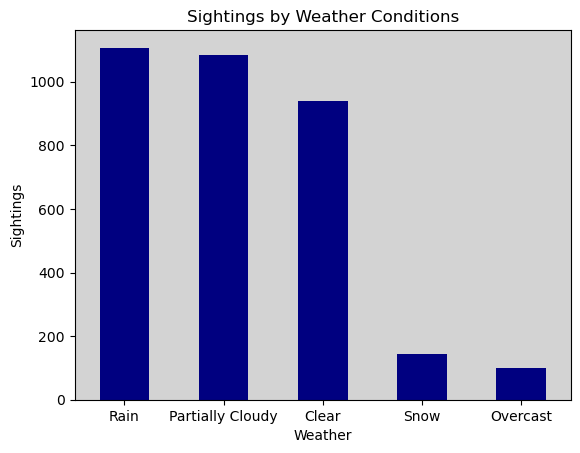

In [4]:
# Bar chart of sightings by weather condition
weatherBar1 = conditions['conditions'].value_counts().plot(kind = 'bar', title= 'Sightings by Weather Conditions',xlabel='Weather',ylabel='Sightings', color = 'navy')
plt.xticks([0, 1, 2, 3, 4], ['Rain', 'Partially Cloudy', 'Clear','Snow','Overcast'],
       rotation=0)
ax = plt.gca()
ax.set_facecolor('lightgrey')

r-squared: 0.031381870907596844


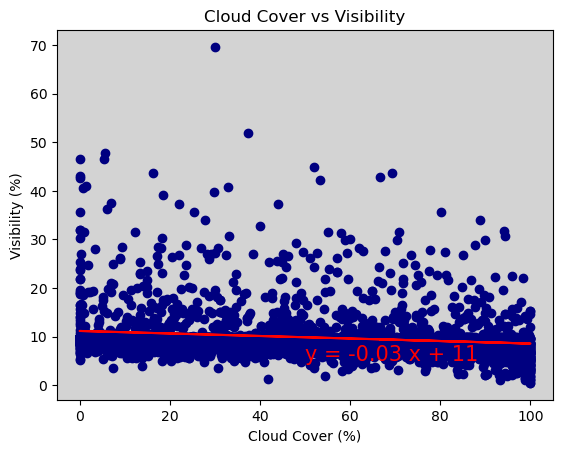

In [18]:
# Linear Regression of cloudiness vs visibility index
(slope,intercept,rvalue,pvalue,stderr) = stats.linregress(weatherData['cloud_cover'],weatherData['visibility'])
regressValues = weatherData['cloud_cover']*slope+intercept
lineEq = 'y = ' + str(round(slope,2)) + ' x + ' + str(round(intercept)) 
plt.scatter(weatherData['cloud_cover'],weatherData['visibility'],color = 'navy')
plt.title('Cloud Cover vs Visibility')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Visibility (%)')
plt.plot(weatherData['cloud_cover'],regressValues,"r-")
plt.annotate(lineEq,(50,5),fontsize = 15, color = 'red')
print(f'r-squared: {rvalue**2}')
ax = plt.gca()
ax.set_facecolor('lightgrey')
plt.show()

In [6]:
# Seperating out class A and class B
ClassA = weatherData.loc[weatherData['classification']=='Class A']
ClassB = weatherData.loc[weatherData['classification']=='Class B']
ClassC = weatherData.loc[weatherData['classification']=='Class C']

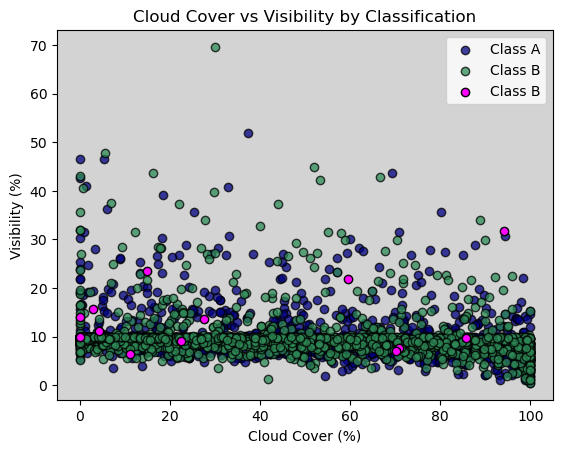

In [7]:

plt.scatter(ClassA['cloud_cover'],ClassA['visibility'],color = 'navy', label = 'Class A', alpha = 0.75, edgecolors = 'black')
plt.scatter(ClassB['cloud_cover'],ClassB['visibility'], color = 'seagreen', label = 'Class B',alpha = 0.75, edgecolors = 'black')
plt.scatter(ClassC['cloud_cover'],ClassC['visibility'], color = 'fuchsia', label = 'Class B',alpha = 1, edgecolors = 'black')
plt.legend()
plt.title('Cloud Cover vs Visibility by Classification')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Visibility (%)')
ax = plt.gca()
ax.set_facecolor('lightgrey')
plt.show()

In [8]:
# Testing if visibility is statistically significantly different between classification 
stats.ttest_ind(ClassA['visibility'],ClassB['visibility'],equal_var = False)


TtestResult(statistic=0.37179573262139504, pvalue=0.7100684171971685, df=3355.4901726505736)